## [Anomaly Detection in Machine Learning](#top)

Anomaly detection in machine learning is the process of identifying anomalies or outliers in a dataset. 

- **Anomalies** are unusual data points which are significantly different to the wider trends in the rest of the data set. They are unexpected deviations from the expected outcome. 

- Anomaly detection in machine learning is an important topic because models are so reliant on high quality data. Anomalies or outliers can skew the quality of this training data, as machine learning models are developed to understand the *relationship between data points*. 

- Outliers may affect **the accuracy of the model** by altering patterns learned by the model. 

- Sometimes models can be overfit to training data too, which lowers the model’s ability to generalise when facing new or unseen data. An anomaly in this case may be a sign that the model itself should be retrained, or a data scientist must intervene. For example if a model was trained without a specific subset of demographic data, a relatively normal data point may be flagged as an anomaly if the model encounters a group unrepresented by the training data. In this case the model would need to be retrained to bring into account the bias. 

### Anomaly categories:
 

1. Point Anomaly: A tuple in a dataset is said to be a Point Anomaly if it is far off from the rest of the data.
2. Contextual Anomaly: An observation is a Contextual Anomaly if it is an anomaly because of the context of the observation.
3. Collective Anomaly: A set of data instances help in finding an anomaly.

## Anomaly Detection using the concepts of Machine Learning:
 
 
* **Supervised Anomaly Detection:** This method requires a labeled dataset containing both normal and anomalous samples to construct a predictive model to classify future data points. The most commonly used algorithms for this purpose are *supervised Neural Networks, Support Vector Machine learning, K-Nearest Neighbors Classifier*, etc.

* **Unsupervised Anomaly Detection:** This method requires any training data and instead assumes two things about the data: <br>
1. Only a small percentage of data is anomalous, 
2. Any anomaly is statistically different from the normal samples. <br><br>
Based on the above assumptions, the data is then clustered using a similarity measure and the data points which are far off from the cluster are considered to be anomalies.

## Anomaly detection using [the K-Nearest Neighbors algorithm](#k-nearest) on a synthetic dataset:

#### Step 1: Importing the required libraries


In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager
from pyod.models.knn import KNN
from pyod.utils.data import generate_data, get_outliers_inliers

#### Step 2: Creating the synthetic data

In [4]:
# generating a random dataset with two features
X_train, y_train = generate_data(n_train = 300, train_only = True, n_features = 2)

# Setting the percentage of outliers
outlier_fraction = 0.1

# Storing the outliers and inliners in different numpy arrays
X_outliers, X_inliers = get_outliers_inliers(X_train, y_train)
n_inliers = len(X_inliers)
n_outliers = len(X_outliers)

# Separating the two features
f1 = X_train[:, [0]].reshape(-1, 1)
f2 = X_train[:, [1]].reshape(-1, 1)


#### Step 3: Visualising the data that was created

Text(0, 0.5, 'Feature 2')

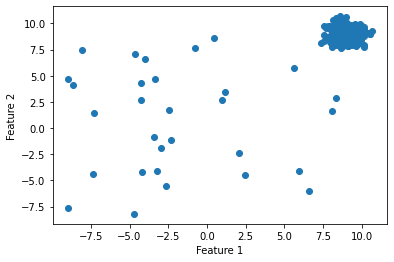

In [5]:
# Visualising the dataset
# create a meshgrid
xx, yy = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))

# scatter plot
plt.scatter(f1, f2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


#### Step 4: Training and evaluating the model

In [9]:
# Training the classifier-clsf
clsf = KNN(contamination = outlier_fraction)
clsf.fit(X_train, y_train)

# You can print this to see all the prediction scores
scores_pred = clsf.decision_function(X_train)*-1

y_pred = clsf.predict(X_train)
n_errors = (y_pred != y_train).sum()
# Counting the number of errors

print('The number of prediction errors are ' + str(n_errors))


The number of prediction errors are 0


C:\Users\Gsr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pyod\models\base.py:412: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


#### Step 5: Visualising the predictions

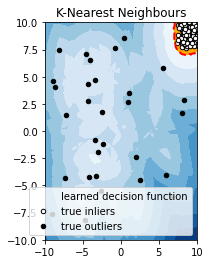

In [12]:
# threshold value to consider a
# datapoint inlier or outlier
threshold = stats.scoreatpercentile(scores_pred, 100 * outlier_fraction)

# decision function calculates the raw
# anomaly score for every point
Z = clsf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

# fill blue colormap from minimum anomaly
# score to threshold value
subplot = plt.subplot(1, 2, 1)
subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10), cmap = plt.cm.Blues_r)

# draw *red* contour line where anomaly
# score is equal to threshold
a = subplot.contour(xx, yy, Z, levels =[threshold],linewidths = 2, colors ='red')

# fill *orange* contour lines where range of anomaly
# score is from threshold to maximum anomaly score
subplot.contourf(xx, yy, Z, levels =[threshold, Z.max()], colors ='orange')

# scatter plot of inliers with **white** dots
b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1],	c ='white', s = 20, edgecolor ='k')

# scatter plot of outliers with **black** dots
c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1],	c ='black', s = 20, edgecolor ='k')
subplot.axis('tight')

subplot.legend(
	[a.collections[0], b, c],
	['learned decision function', 'true inliers', 'true outliers'],
	prop = matplotlib.font_manager.FontProperties(size = 10),
	loc ='lower right')

subplot.set_title('K-Nearest Neighbours')
subplot.set_xlim((-10, 10))
subplot.set_ylim((-10, 10))
plt.show()
